In [37]:
from tensorflow import keras
import numpy as np
import tensorflow as tf

In [9]:
model=keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])
model.compile(loss="mean_squared_error",optimizer="sgd")
xs=np.array([-1,0,1,2,3,4])
ys=np.array([-3,-1,1,3,5,7])
model.fit(xs,ys,epochs=500)
print(model.predict([10.0]))

Epoch 1/500
6/6 [==============================] - 0s 14ms/sample - loss: 23.4445
Epoch 2/500
6/6 [==============================] - 0s 447us/sample - loss: 22.9476
Epoch 3/500
6/6 [==============================] - 0s 453us/sample - loss: 22.4618
Epoch 4/500
6/6 [==============================] - 0s 323us/sample - loss: 21.9868
Epoch 5/500
6/6 [==============================] - 0s 398us/sample - loss: 21.5225
Epoch 6/500
6/6 [==============================] - 0s 540us/sample - loss: 21.0685
Epoch 7/500
6/6 [==============================] - 0s 554us/sample - loss: 20.6246
Epoch 8/500
6/6 [==============================] - 0s 514us/sample - loss: 20.1907
Epoch 9/500
6/6 [==============================] - 0s 544us/sample - loss: 19.7665
Epoch 10/500
6/6 [==============================] - 0s 554us/sample - loss: 19.3518
Epoch 11/500
6/6 [==============================] - 0s 926us/sample - loss: 18.9463
Epoch 12/500
6/6 [==============================] - 0s 658us/sample - loss: 18.5498
Ep

Now you might think it would return 19 because after all Y equals 2X minus 1, and you think it should be 19. But when you try this in the workbook yourself, you'll see that it will return a value very close to 19 but not exactly 19. Now why do you think that would be? Ultimately there are two main reasons. The first is that you trained it using very little data. There's only six points. Those six points are linear but there's no guarantee that for every X, the relationship will be Y equals 2X minus 1. There's a very high probability that Y equals 19 for X equals 10, but the neural network isn't positive. So it will figure out a realistic value for Y. That's the second main reason. When using neural networks, as they try to figure out the answers for everything, they deal in probability

# week 2

In [12]:
mnist = tf.keras.datasets.fashion_mnist

In [13]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [14]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

In [15]:
#Normalizing
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [17]:
model=keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),#this is the shape that we should expect the data to be in. 
                               #Flatten takes this 28 by 28 square and turns it into a simple linear array. 
                              keras.layers.Dense(128,activation=tf.nn.relu),
                              keras.layers.Dense(10,activation=tf.nn.softmax)])
#Softmax takes a set of values, and effectively picks the biggest one, so, for example, 
#if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], 
#it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0]

In [18]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4963 - accuracy: 0.8276
Epoch 2/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3745 - accuracy: 0.8642
Epoch 3/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3388 - accuracy: 0.8757
Epoch 4/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3131 - accuracy: 0.8842
Epoch 5/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2947 - accuracy: 0.8907


In [19]:
model.evaluate(test_images, test_labels)


10000/10000 [==============================] - 0s 46us/sample - loss: 0.3719 - accuracy: 0.8642


[0.371862806391716, 0.8642]

In [20]:
classifications = model.predict(test_images)

print(classifications[0])

[1.4160755e-06 3.7670057e-07 4.2952379e-07 5.3747362e-10 3.6615943e-06 5.7243247e-04 1.7492586e-06 1.7810850e-03 5.4016014e-06 9.9763346e-01]


The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For the 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that it's almost certainly a 7.

In [22]:
print(test_labels[0])


9


Here we increase the number of neurons to 1024.

In [23]:
model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model1.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')



In [24]:
model1.fit(training_images, training_labels, epochs=5)



Epoch 1/5
60000/60000 [==============================] - 14s 238us/sample - loss: 0.4682
Epoch 2/5
60000/60000 [==============================] - 16s 267us/sample - loss: 0.3561
Epoch 3/5
60000/60000 [==============================] - 14s 241us/sample - loss: 0.3221
Epoch 4/5
60000/60000 [==============================] - 14s 226us/sample - loss: 0.2965
Epoch 5/5
60000/60000 [==============================] - 13s 220us/sample - loss: 0.2785


In [25]:
model1.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 91us/sample - loss: 0.3484


0.34835763573646544

Conclusion: Training takes longer, but is more accurate

What would happen if you remove the Flatten() layer. Why do you think that's the case?

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

In [28]:
model2=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [31]:
model2.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [32]:
model2.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 187us/sample - loss: 0.4656 - accuracy: 0.8325
Epoch 2/5
60000/60000 [==============================] - 10s 172us/sample - loss: 0.3553 - accuracy: 0.8680
Epoch 3/5
60000/60000 [==============================] - 10s 173us/sample - loss: 0.3190 - accuracy: 0.8813
Epoch 4/5
60000/60000 [==============================] - 10s 170us/sample - loss: 0.2932 - accuracy: 0.8894
Epoch 5/5
60000/60000 [==============================] - 11s 191us/sample - loss: 0.2782 - accuracy: 0.8963


In [34]:
model2.evaluate(test_images, test_labels)


10000/10000 [==============================] - 1s 73us/sample - loss: 0.3534 - accuracy: 0.8736


[0.3533879474401474, 0.8736]

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

## Consider the impact of training for more or less epochs. Why do you think that would be the case?

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5 Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

## Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks!

In [35]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()



In [36]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=["accuracy"])
model2.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
59872/60000 [============================>.] - ETA: 0s - loss: 0.2641 - accuracy: 0.9002
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 11s 180us/sample - loss: 0.2641 - accuracy: 0.9002


Sometimes while using callback functions, you might encounter an error of ""TypeError: '>' not supported between instances of 'Nonetype' and 'float'."" to avoid this, we must use acc instead of accuracy or vice-versa which solves the problem

# week 3

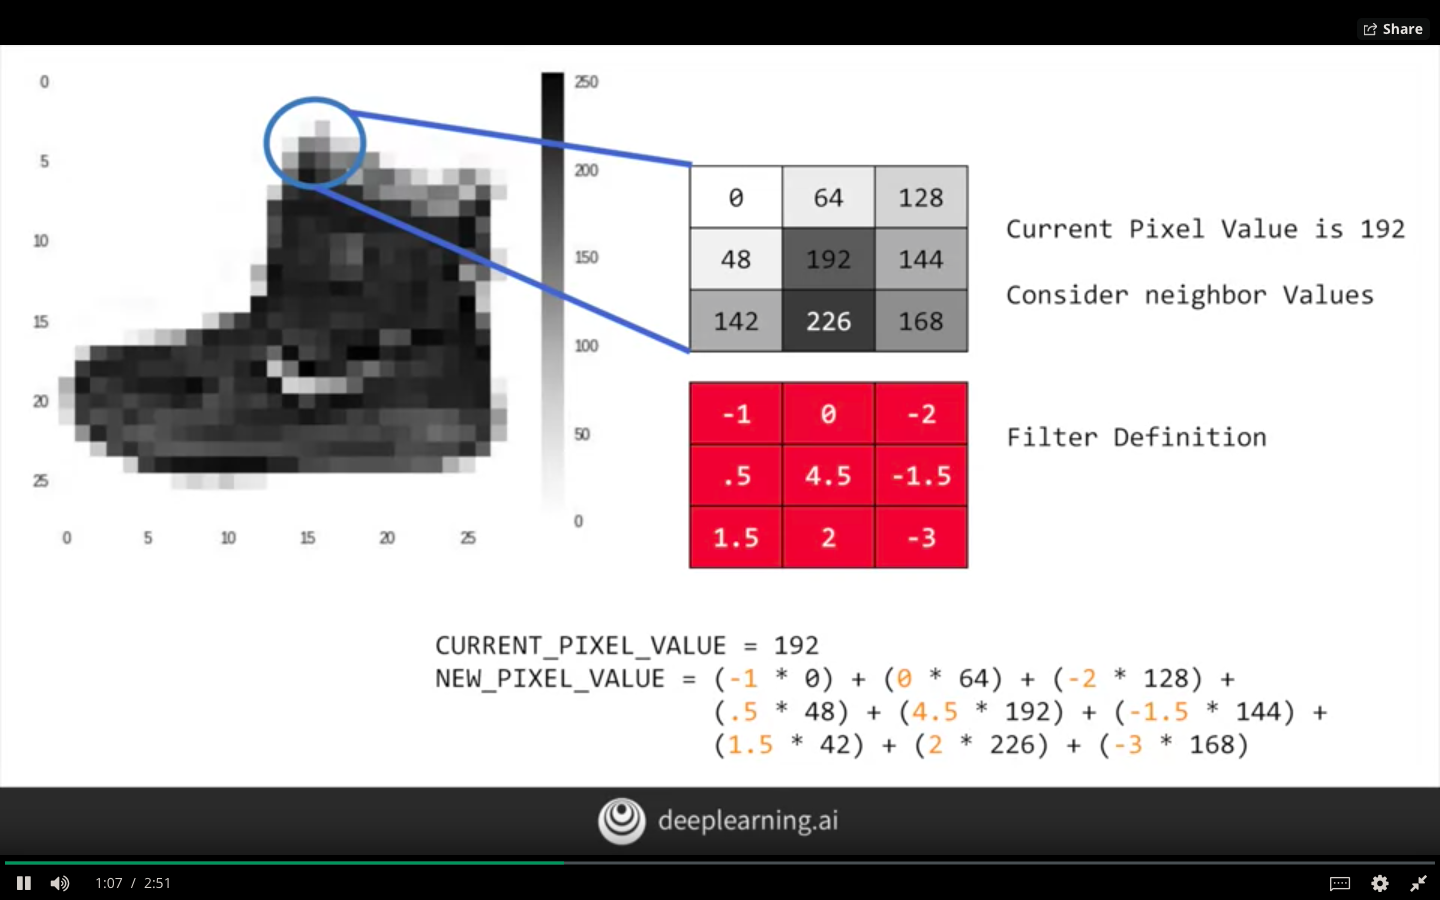

it usually involves having a filter and passing that filter over the image in order to change the underlying image. The process works a little bit like this. For every pixel, take its value, and take a look at the value of its neighbors. If our filter is three by three, then we can take a look at the immediate neighbor, so that you have a corresponding three by three grid. Then to get the new value for the pixel, we simply multiply each neighbor by the corresponding value in the filter. So, for example, in this case, our pixel has the value 192, and its upper left neighbor has the value zero. The upper left value and the filter is negative one, so we multiply zero by negative one. Then we would do the same for the upper neighbor. Its value is 64 and the corresponding filter value was zero, so we'd multiply those out. Repeat this for each neighbor and each corresponding filter value, and would then have the new pixel with the sum of each of the neighbor values multiplied by the corresponding filter value, and that's a convolution.

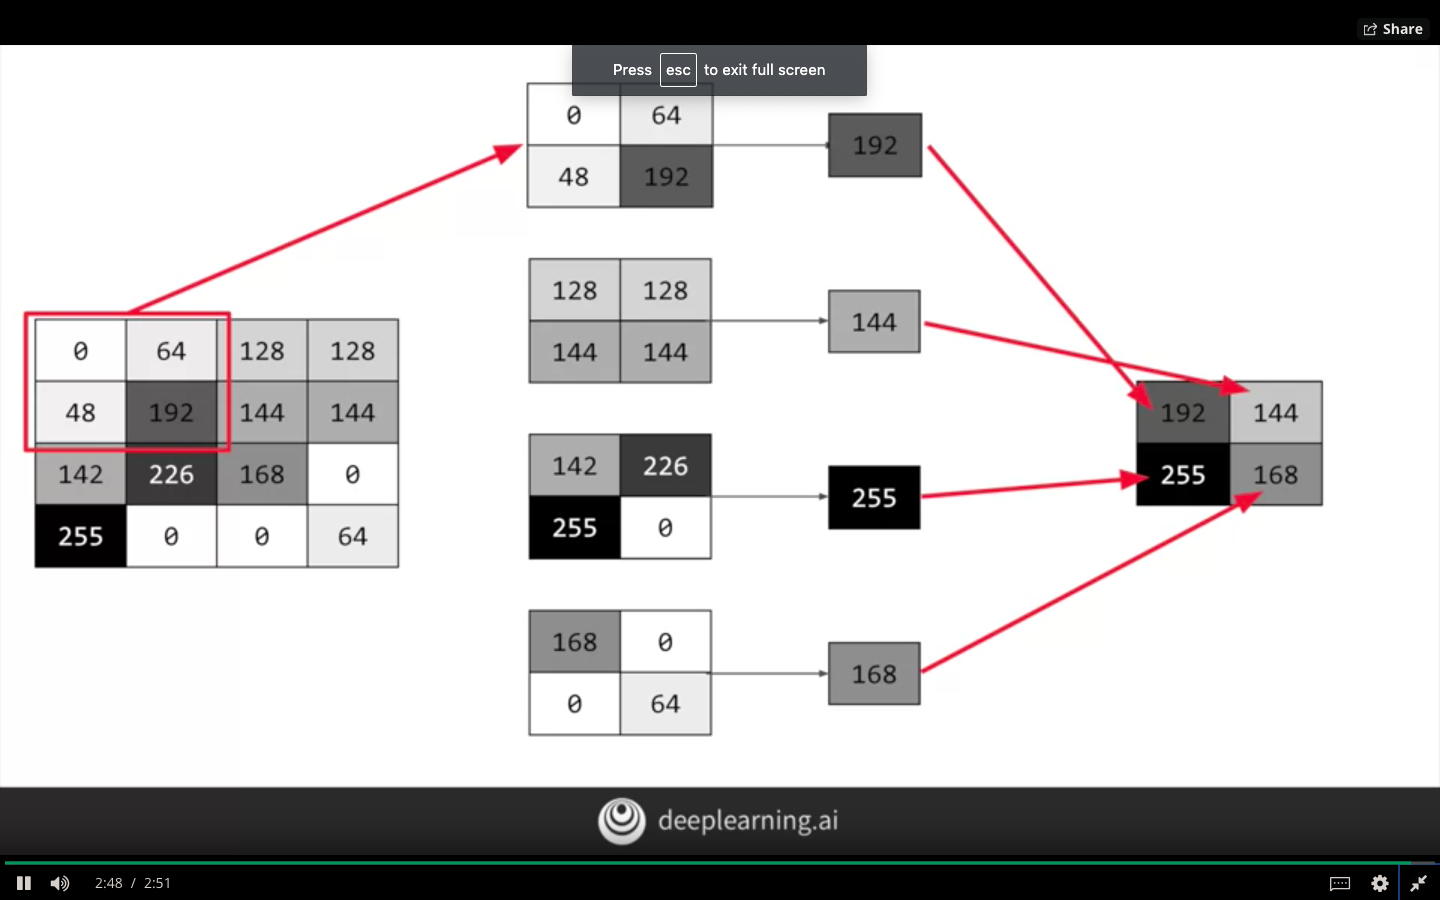

But simply, pooling is a way of compressing an image. A quick and easy way to do this, is to go over the image of four pixels at a time, i.e, the current pixel and its neighbors underneath and to the right of it. Of these four, pick the biggest value and keep just that. So, for example, you can see it here. My 16 pixels on the left are turned into the four pixels on the right, by looking at them in two-by-two grids and picking the biggest value. This will preserve the features that were highlighted by the convolution, while simultaneously quartering the size of the image. We have the horizontal and vertical axes.

In [38]:

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)), #We're asking keras to generate 64 filters for us.
#These filters are 3 by 3, their activation is relu, which means the negative values will be thrown way, and finally the input shape is as before, the 28 by 28.
#That extra 1 just means that we are tallying using a single byte for color depth. As we saw before our image is our gray scale, so we just use one byte.    
  tf.keras.layers.MaxPooling2D(2, 2),  #this is the pooling, such that 4 pixels are taken, and max value of the 4 pixels is taken.  
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

Here the image first gets converted from 28x28 to 26x26 because 2 rows and columns, each from the start and end cant be included in the filter, as they have no corresponding neighbours around them.<br>The 26*26 gets converted into half as we have mentioned the pooling to be 2*2, hence getting cut into half.<br>For every image, 64 convolutions are being tried, and then the image is compressed and then another 64 convolutions, and then it's compressed again, and then it's passed through the DNN, and that's for 60,000 images that this is happening on each epoch.

## Visualization the convolution and pooling

In [40]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4
 2]


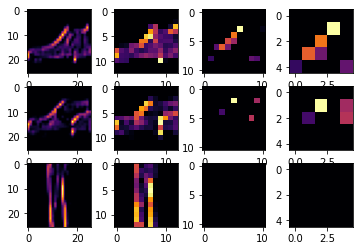

In [44]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=3
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

here we can see that for shoes, after the convolutions, they end up having similar physical features about the shoes laces.
if we do the same for pants, we will be able to see the vertical feature that will be able to distinguish between the shoes and pants. 
so each convolution ensures that there ends up a different distinguishable feature.

EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

# week 4

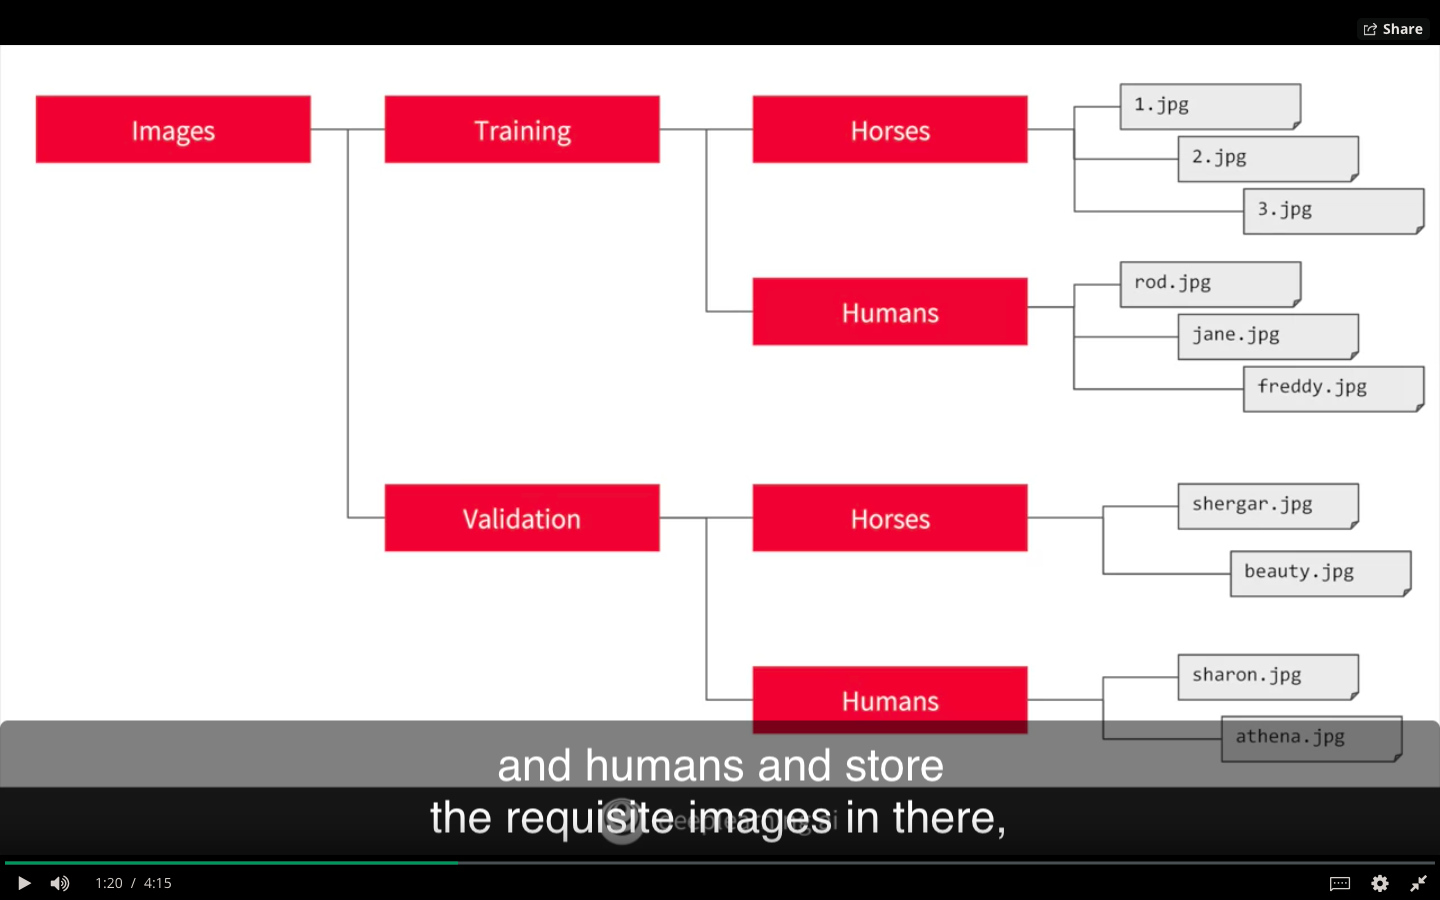

In [2]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [6]:
import wget
url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip'
wget.download(url, '/Users/eshanchatty/Downloads/horse-or-human.zip')


'/Users/eshanchatty/Downloads/horse-or-human.zip'

In [7]:
import wget
url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip'
wget.download(url, '/Users/eshanchatty/Downloads/validation-horse-or-human.zip')


'/Users/eshanchatty/Downloads/validation-horse-or-human.zip'

In [9]:
pip install zipfile

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os 
import zipfile 
local_zip = '/Users/eshanchatty/Downloads/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('horse-or-human')
local_zip = '/Users/eshanchatty/Downloads/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('validation-horse-or-human')
zip_ref.close()

In [3]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('validation-horse-or-human/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse43-5.png', 'horse06-5.png', 'horse20-6.png', 'horse04-7.png', 'horse41-7.png', 'horse22-4.png', 'horse19-2.png', 'horse24-2.png', 'horse37-8.png', 'horse02-1.png']
['human17-22.png', 'human10-17.png', 'human10-03.png', 'human07-27.png', 'human09-22.png', 'human05-22.png', 'human02-03.png', 'human02-17.png', 'human15-27.png', 'human12-12.png']
['horse1-204.png', 'horse2-112.png', 'horse3-498.png', 'horse5-032.png', 'horse5-018.png', 'horse1-170.png', 'horse5-192.png', 'horse1-411.png', 'horse4-232.png', 'horse3-070.png']
['valhuman04-20.png', 'valhuman03-01.png', 'valhuman04-08.png', 'valhuman03-15.png', 'valhuman01-04.png', 'valhuman01-10.png', 'valhuman01-11.png', 'valhuman01-05.png', 'valhuman03-14.png', 'valhuman03-00.png']


In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

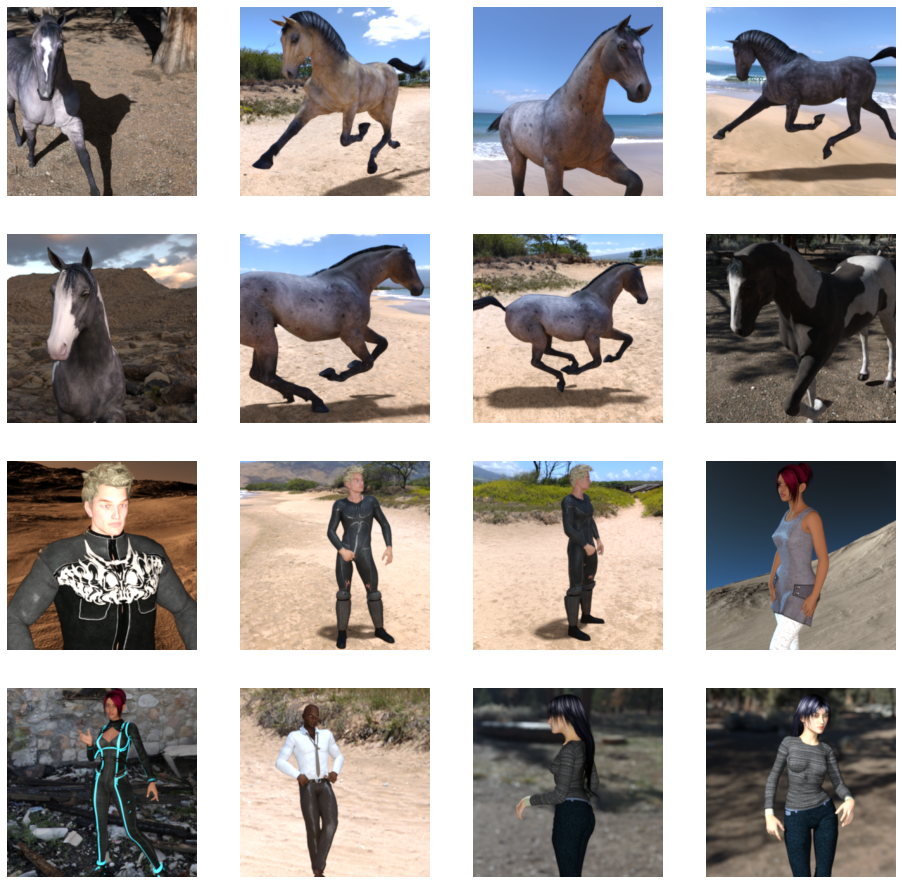

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## building a model

In [8]:
import tensorflow as tf

/Users/eshanchatty/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/eshanchatty/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/eshanchatty/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/eshanchatty/opt/anaconda3/lib/python3.7/site-

In [9]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

In [17]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)


## Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit, evaluate_generator, and predict_generator.



In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)

In [27]:
train_generator=train_datagen.flow_from_directory('horse-or-human',target_size=(300, 300)# All images will be resized to 150x150
                                                  ,batch_size=128,class_mode='binary')

Found 1027 images belonging to 2 classes.


In [28]:
# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 256 images belonging to 2 classes.


In [21]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=10,
      verbose=1)
#history = model.fit(
      #steps_per_epoch=8,  
      #epochs=15,
      #verbose=1,
      #validation_data = validation_generator,
      #validation_steps=8)
#This also checks the validation set to give us loss and accuracy there.

Epoch 1/10
8/8 [==============================] - 71s 9s/step - loss: 0.7397 - accuracy: 0.5264
Epoch 2/10
8/8 [==============================] - 49s 6s/step - loss: 0.7580 - accuracy: 0.6576
Epoch 3/10
8/8 [==============================] - 66s 8s/step - loss: 0.5275 - accuracy: 0.7715
Epoch 4/10
8/8 [==============================] - 52s 7s/step - loss: 0.3739 - accuracy: 0.8592
Epoch 5/10
8/8 [==============================] - 68s 8s/step - loss: 0.3278 - accuracy: 0.9023
Epoch 6/10
8/8 [==============================] - 49s 6s/step - loss: 0.0823 - accuracy: 0.9664
Epoch 7/10
8/8 [==============================] - 56s 7s/step - loss: 0.2243 - accuracy: 0.9344
Epoch 8/10
8/8 [==============================] - 75s 9s/step - loss: 0.1514 - accuracy: 0.9434
Epoch 9/10
8/8 [==============================] - 66s 8s/step - loss: 0.0294 - accuracy: 0.9900
Epoch 10/10
8/8 [==============================] - 62s 8s/step - loss: 0.3313 - accuracy: 0.9188


In [23]:
import numpy as np
import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

ModuleNotFoundError: No module named 'files'

## Visualizing Intermediate Representations
To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/Users/eshanchatty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


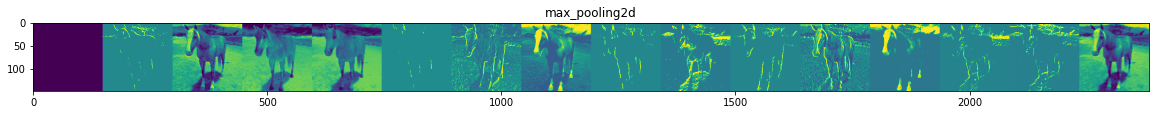

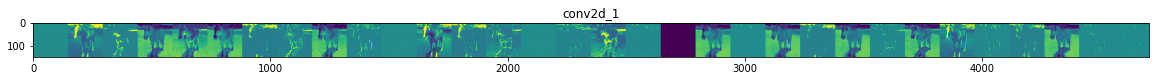

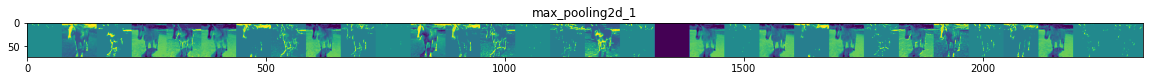

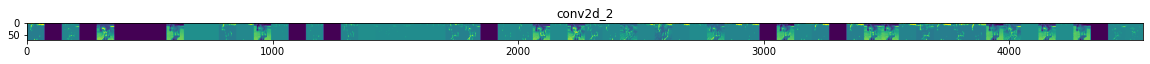

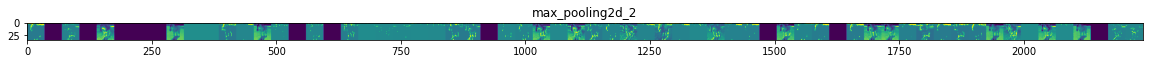

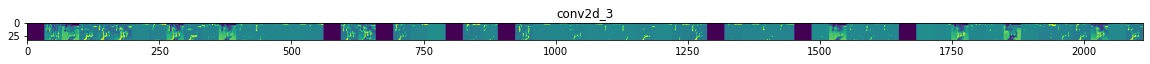

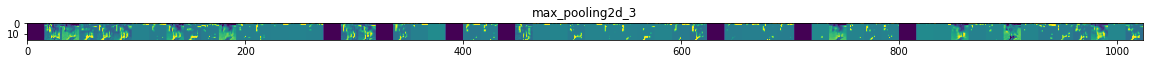

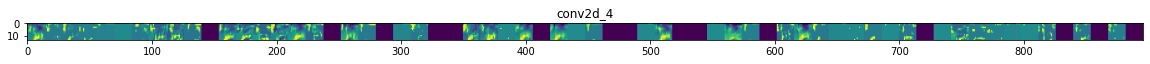

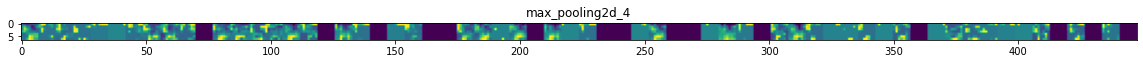

In [24]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.

These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.